In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import fileinput
import numpy as np

In [3]:
lines = []
fileName = "in1.txt"
G = nx.DiGraph()
for line in fileinput.input(files=fileName, encoding="utf-8"):
    lines.append(line.replace("\n", "").split(" "))
nodeCnt = int(lines[0][0])
for i in range(nodeCnt):
    G.add_node(i+1)
for i in range(1, nodeCnt+1):
    for start in lines[i][1:]:
        G.add_edge(int(start), i)

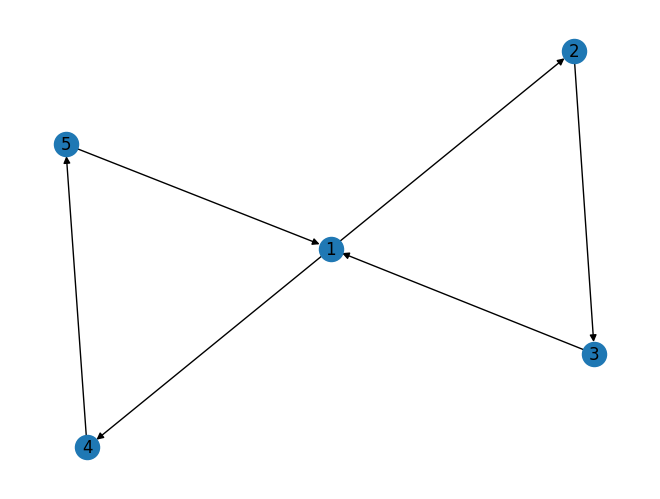

In [4]:
nx.draw(G, with_labels=True)

In [12]:
# finds and returns the node with the highest "closeness centrality"
def get_most_close_node(G):
    nodes = G.nodes
    max_centrality = -1*np.inf
    most_central_node = None
    for n in nodes:
        clos_centr = nx.closeness_centrality(G, n)
        if clos_centr > max_centrality:
            max_centrality = clos_centr
            most_central_node = n
    return most_central_node

# finds and returns the node with the highest "betweenness centrality"
def get_most_between_node(G):
    centralities = nx.betweenness_centrality(G)
    max_value = max(centralities, key=centralities.get)
    return max_value


[[1, 2, 3], [1, 4, 5]]